In [4]:
import pandas as pd
df_big5 = pd.read_csv("big_5.csv")
df_reviews = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [43]:
print(" Dataset Big Five (annoté)")
print("Shape:", df_big5.shape)
print(df_big5.dtypes)
print(df_big5.head(3))

 Dataset Big Five (annoté)
Shape: (1900, 7)
Review Text        object
O                 float64
C                 float64
E                 float64
A                 float64
N                 float64
Cleaned Review     object
dtype: object
                                        Review Text     O    C     E    A  \
0  The product was amazing, better than I expected!  0.85  0.9  0.95  0.9   
1     Customer service was useless, no help at all.  0.30  0.3  0.20  0.2   
2              Average quality, nothing impressive.  0.40  0.5  0.40  0.5   

     N                                  Cleaned Review  
0  0.1  the product was amazing better than i expected  
1  0.9     customer service was useless no help at all  
2  0.4              average quality nothing impressive  


In [44]:
print("\n Dataset à prédire (e-commerce reviews)")
print("Shape:", df_reviews.shape)
print(df_reviews.dtypes)
print(df_reviews.head(3))


 Dataset à prédire (e-commerce reviews)
Shape: (23486, 11)
Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object
   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   

                                                                                                                                             Review Text  \
0                                                                                                  Absolutely wonderful - silky and sexy and comfortable   

In [45]:
print("\n Valeurs manquantes dans df_big5 :")
print(df_big5.isnull().sum())


 Valeurs manquantes dans df_big5 :
Review Text       0
O                 0
C                 0
E                 0
A                 0
N                 0
Cleaned Review    0
dtype: int64


In [46]:
print("\n Valeurs manquantes dans df_reviews :")
print(df_reviews.isnull().sum())


 Valeurs manquantes dans df_reviews :
Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


In [47]:
# Statistiques sur les traits Big Five
print("\n Statistiques descriptives des scores Big Five :")
print(df_big5[["O", "C", "E", "A", "N"]].describe())


 Statistiques descriptives des scores Big Five :
                 O            C            E            A            N
count  1900.000000  1900.000000  1900.000000  1900.000000  1900.000000
mean      0.529684     0.485711     0.480763     0.457289     0.470816
std       0.416308     0.417126     0.372755     0.351070     0.417741
min       0.100000     0.050000     0.100000     0.050000     0.050000
25%       0.100000     0.050000     0.100000     0.100000     0.050000
50%       0.700000     0.750000     0.700000     0.650000     0.200000
75%       0.950000     0.900000     0.850000     0.800000     0.900000
max       0.950000     0.950000     0.950000     0.950000     0.950000


In [10]:
df_reviews_cleaned = df_reviews[["Review Text"]].dropna().reset_index(drop=True)


In [11]:
def clean_text(text):
    text = text.lower()  # tout en minuscules
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # retirer ponctuation, chiffres, caractères spéciaux
    text = re.sub(r"\s+", " ", text)  # remplacer les espaces multiples par un seul
    return text.strip()

In [12]:
df_reviews_cleaned["Cleaned Review"] = df_reviews_cleaned["Review Text"].apply(clean_text)


In [13]:
df_reviews_cleaned.head()


,Review Text,Cleaned Review
0,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky and sexy and comfor...
1,Love this dress! it's sooo pretty. i happene...,love this dress its sooo pretty i happened to ...
2,I had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",i love love love this jumpsuit its fun flirty ...
4,This shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...


In [15]:
print("\n🔎 Valeurs manquantes dans df_reviews :")
print(df_reviews_cleaned.isnull().sum())


🔎 Valeurs manquantes dans df_reviews :
Review Text       0
Cleaned Review    0
dtype: int64


In [16]:
# ⚙️ Cellule 3 — Feature Engineering : TF-IDF sur les textes du dataset annoté

from sklearn.feature_extraction.text import TfidfVectorizer

# 🔹 Nettoyer les textes annotés Big Five
df_big5_cleaned = df_big5[["Review Text", "O", "C", "E", "A", "N"]].dropna().copy()

# 🔹 Nettoyage texte
df_big5_cleaned["Cleaned Review"] = df_big5_cleaned["Review Text"].apply(clean_text)

# 🔹 Initialiser TF-IDF
tfidf = TfidfVectorizer(max_features=3000)

# 🔹 Transformer les textes en vecteurs
X_tfidf = tfidf.fit_transform(df_big5_cleaned["Cleaned Review"])

# 🔹 Préparer les cibles Big Five
y = df_big5_cleaned[["O", "C", "E", "A", "N"]]

#  Afficher dimensions
print("TF-IDF shape :", X_tfidf.shape)
print("Target shape :", y.shape)


TF-IDF shape : (1900, 986)
Target shape : (1900, 5)


In [17]:
# 🤖 Cellule 4 — Entraînement du modèle Big Five

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error

# 🔹 Séparation des données en training et test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 🔹 Initialisation du modèle RandomForest pour chaque cible
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))

# 🔹 Entraînement du modèle
model.fit(X_train, y_train)

# 🔹 Prédiction sur le set test
y_pred = model.predict(X_test)

# 🔹 Calcul du MAE pour chaque trait Big Five
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
traits = ["O", "C", "E", "A", "N"]
for trait, m in zip(traits, mae):
    print(f"MAE for {trait}: {m:.3f}")


MAE for O: 0.117
MAE for C: 0.119
MAE for E: 0.104
MAE for A: 0.100
MAE for N: 0.117


In [18]:
# 🚀 Cellule 4 — Entraînement du modèle : RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# 🔹 Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 🔹 Initialisation du modèle RandomForest pour prédiction multiple
rf = RandomForestRegressor(n_estimators=100, random_state=42)
multi_rf = MultiOutputRegressor(rf)

# 🔹 Entraînement du modèle
multi_rf.fit(X_train, y_train)

# 🔹 Prédictions sur le test
y_pred = multi_rf.predict(X_test)

# 🔹 Calculer l'erreur absolue moyenne (MAE) pour chaque trait
mae = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print("Mean Absolute Error (MAE) pour tous les traits : ", mae)

# 🔹 Afficher les MAE pour chaque score
mae_per_trait = {trait: mean_absolute_error(y_test[trait], y_pred[:, i]) for i, trait in enumerate(["O", "C", "E", "A", "N"])}
print("\nMAE par trait :")
for trait, error in mae_per_trait.items():
    print(f"{trait}: {error}")


Mean Absolute Error (MAE) pour tous les traits :  0.11150982456140404

MAE par trait :
O: 0.11745789473684237
C: 0.11891973684210559
E: 0.10395000000000042
A: 0.10023333333333405
N: 0.11698815789473772


In [19]:
# 🤖 Variante — Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor

# 🔹 Entraînement avec Ridge
ridge_model = MultiOutputRegressor(Ridge(alpha=1.0))
ridge_model.fit(X_train, y_train)

# 🔹 Prédiction
y_pred_ridge = ridge_model.predict(X_test)

# 🔹 MAE
mae_ridge = mean_absolute_error(y_test, y_pred_ridge, multioutput='raw_values')
print("🔎 MAE - Ridge Regression")
for trait, m in zip(traits, mae_ridge):
    print(f"MAE for {trait}: {m:.3f}")


🔎 MAE - Ridge Regression
MAE for O: 0.145
MAE for C: 0.149
MAE for E: 0.132
MAE for A: 0.127
MAE for N: 0.146


In [20]:
# 🌲 Cellule 4 — Entraînement avec Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

# 🔹 Initialiser le modèle
gbr_model = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))

# 🔹 Entraîner
gbr_model.fit(X_train, y_train)

# 🔹 Prédire
y_pred_gbr = gbr_model.predict(X_test)

# 🔹 MAE
mae_gbr = mean_absolute_error(y_test, y_pred_gbr, multioutput='raw_values')
print("🔎 MAE - Gradient Boosting")
for trait, m in zip(traits, mae_gbr):
    print(f"MAE for {trait}: {m:.3f}")


🔎 MAE - Gradient Boosting
MAE for O: 0.161
MAE for C: 0.165
MAE for E: 0.150
MAE for A: 0.143
MAE for N: 0.163


In [21]:
# ⚡ Cellule 4 — Entraînement avec XGBoost

from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

# 🔹 Créer un modèle XGBoost multi-sortie
xgb_model = MultiOutputRegressor(XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))

# 🔹 Entraîner
xgb_model.fit(X_train, y_train)

# 🔹 Prédiction
y_pred_xgb = xgb_model.predict(X_test)

# 🔹 MAE
mae_xgb = mean_absolute_error(y_test, y_pred_xgb, multioutput='raw_values')
print("🔎 MAE - XGBoost")
for trait, m in zip(traits, mae_xgb):
    print(f"MAE for {trait}: {m:.3f}")


🔎 MAE - XGBoost
MAE for O: 0.150
MAE for C: 0.153
MAE for E: 0.137
MAE for A: 0.131
MAE for N: 0.150


In [22]:
# 💡 Cellule 4 — Entraînement avec LightGBM

from lightgbm import LGBMRegressor
from sklearn.multioutput import MultiOutputRegressor

# 🔹 Initialiser le modèle LightGBM
lgb_model = MultiOutputRegressor(LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42))

# 🔹 Entraîner
lgb_model.fit(X_train, y_train)

# 🔹 Prédire
y_pred_lgb = lgb_model.predict(X_test)

# 🔹 MAE
mae_lgb = mean_absolute_error(y_test, y_pred_lgb, multioutput='raw_values')
print("🔎 MAE - LightGBM")
for trait, m in zip(traits, mae_lgb):
    print(f"MAE for {trait}: {m:.3f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1378
[LightGBM] [Info] Number of data points in the train set: 1520, number of used features: 83
[LightGBM] [Info] Start training from score 0.527105
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1378
[LightGBM] [Info] Number of data points in the train set: 1520, number of used features: 83
[LightGBM] [Info] Start training from score 0.483257
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [23]:
# 🔥 Cellule 4 — Réseau de neurones avec Keras

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_absolute_error

# 🔹 Définir le modèle
nn_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='linear')  # 5 sorties pour O, C, E, A, N
])

# 🔹 Compiler le modèle
nn_model.compile(optimizer='adam', loss='mae', metrics=['mae'])

# 🔹 Entraînement
history = nn_model.fit(X_train.toarray(), y_train.values, 
                       validation_split=0.1,
                       epochs=10, batch_size=32, verbose=1)

# 🔹 Prédictions
y_pred_nn = nn_model.predict(X_test.toarray())

# 🔹 Évaluation
mae_nn = mean_absolute_error(y_test, y_pred_nn, multioutput='raw_values')
print("🔎 MAE - Neural Network")
for trait, m in zip(traits, mae_nn):
    print(f"MAE for {trait}: {m:.3f}")





Epoch 1/10


43/43 [==============================] - 2s 14ms/step - loss: 0.3216 - mae: 0.3216 - val_loss: 0.1794 - val_mae: 0.1794
Epoch 2/10
43/43 [==============================] - 0s 8ms/step - loss: 0.1471 - mae: 0.1471 - val_loss: 0.1424 - val_mae: 0.1424
Epoch 3/10
43/43 [==============================] - 0s 8ms/step - loss: 0.1100 - mae: 0.1100 - val_loss: 0.1373 - val_mae: 0.1373
Epoch 4/10
43/43 [==============================] - 0s 7ms/step - loss: 0.0946 - mae: 0.0946 - val_loss: 0.1256 - val_mae: 0.1256
Epoch 5/10
43/43 [==============================] - 0s 7ms/step - loss: 0.0854 - mae: 0.0854 - val_loss: 0.1276 - val_mae: 0.1276
Epoch 6/10
43/43 [==============================] - 0s 7ms/step - loss: 0.0791 - mae: 0.0791 - val_loss: 0.1225 - val_mae: 0.1225
Epoch 7/10
43/43 [==============================] - 0s 7ms/step - loss: 0.0734 - mae: 0.0734 - val_loss: 0.1244 - val_mae: 0.1244
Epoch 8/10
43/43 [==============================] - 0s 8ms/step - loss: 0.0690 - mae

In [24]:
# ⚙️ Préparation : Tokenizer + Padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 🔹 Tokenisation
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_big5_cleaned["Cleaned Review"])

# 🔹 Sequences
X_seq = tokenizer.texts_to_sequences(df_big5_cleaned["Cleaned Review"])
X_pad = pad_sequences(X_seq, padding='post', maxlen=100)

# 🔹 Targets
y = df_big5_cleaned[["O", "C", "E", "A", "N"]].values

# 🔹 Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# 🧠 Modèle LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

lstm_model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(5, activation='linear')  # 5 traits Big Five
])

# 🔧 Compilation
lstm_model.compile(optimizer='adam', loss='mae', metrics=['mae'])

# 🔁 Entraînement
lstm_model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=32)

# 📊 Prédiction
y_pred_lstm = lstm_model.predict(X_test)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm, multioutput='raw_values')

# 📈 MAE par trait
print("🔎 MAE - LSTM")
for trait, m in zip(["O", "C", "E", "A", "N"], mae_lstm):
    print(f"MAE for {trait}: {m:.3f}")


Epoch 1/10
43/43 [==============================] - 8s 95ms/step - loss: 0.4020 - mae: 0.4020 - val_loss: 0.3891 - val_mae: 0.3891
Epoch 2/10
43/43 [==============================] - 3s 64ms/step - loss: 0.3954 - mae: 0.3954 - val_loss: 0.3939 - val_mae: 0.3939
Epoch 3/10
43/43 [==============================] - 3s 67ms/step - loss: 0.3991 - mae: 0.3991 - val_loss: 0.3911 - val_mae: 0.3911
Epoch 4/10
43/43 [==============================] - 3s 64ms/step - loss: 0.3963 - mae: 0.3963 - val_loss: 0.3914 - val_mae: 0.3914
Epoch 5/10
43/43 [==============================] - 3s 71ms/step - loss: 0.3958 - mae: 0.3958 - val_loss: 0.3937 - val_mae: 0.3937
Epoch 6/10
43/43 [==============================] - 3s 78ms/step - loss: 0.3938 - mae: 0.3938 - val_loss: 0.3931 - val_mae: 0.3931
Epoch 7/10
43/43 [==============================] - 3s 71ms/step - loss: 0.3948 - mae: 0.3948 - val_loss: 0.3921 - val_mae: 0.3921
Epoch 8/10
43/43 [==============================] - 3s 66ms/step - loss: 0.3965 - m

C:\Users\user\AppData\Local\Temp\ipykernel_2440\959117932.py:39: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


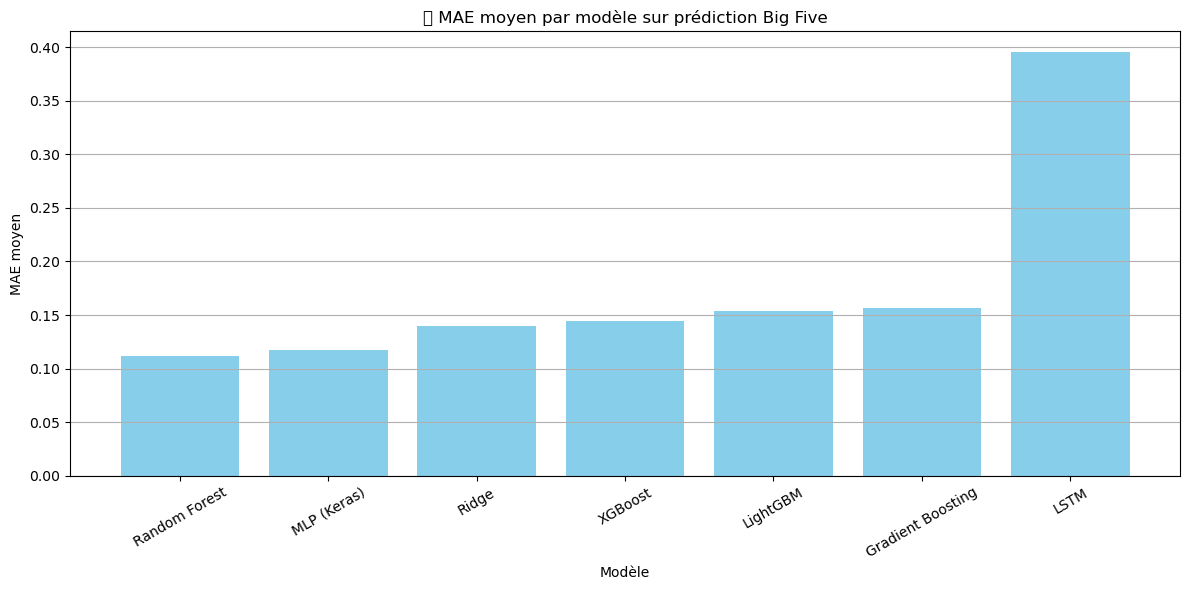

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np
import os

# 📦 Automatisation à partir des prédictions déjà effectuées

# 🔹 Dictionnaire contenant les noms de modèles et leurs prédictions (doit être défini dynamiquement dans le notebook)
models_outputs = {
    "Random Forest": ("multi_rf", "y_pred"),
    "Ridge": ("ridge_model", "y_pred_ridge"),
    "Gradient Boosting": ("gbr_model", "y_pred_gbr"),
    "XGBoost": ("xgb_model", "y_pred_xgb"),
    "LightGBM": ("lgb_model", "y_pred_lgb"),
    "MLP (Keras)": ("nn_model", "y_pred_nn"),
    "LSTM": ("lstm_model", "y_pred_lstm")
}

# 🔎 Extraction et calcul du MAE moyen automatiquement
mae_dict = {}
for model_name, (model_var, y_pred_var) in models_outputs.items():
    if y_pred_var in globals():
        y_pred_val = globals()[y_pred_var]
        mae = mean_absolute_error(y_test, y_pred_val, multioutput='raw_values')
        mae_dict[model_name] = np.mean(mae)

# 🔢 Convertir en DataFrame pour tri
mae_df = pd.DataFrame(list(mae_dict.items()), columns=["Modèle", "MAE Moyen"]).sort_values(by="MAE Moyen")

# 📊 Visualisation
plt.figure(figsize=(12, 6))
plt.bar(mae_df["Modèle"], mae_df["MAE Moyen"], color='skyblue')
plt.title("📉 MAE moyen par modèle sur prédiction Big Five")
plt.xlabel("Modèle")
plt.ylabel("MAE moyen")
plt.xticks(rotation=30)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


In [30]:
# 📦 Créer un DataFrame avec les prédictions et les commentaires
df_predictions = pd.DataFrame(predictions_all_reviews, columns=["O", "C", "E", "A", "N"])
df_predictions["Review Text"] = df_reviews_cleaned["Review Text"].values

# 📤 Afficher les 10 premières prédictions
print(df_predictions.head(10))

# 💾 Sauvegarder le fichier CSV
df_predictions.to_csv("big5_predictions_reviews.csv", index=False)
print("✅ Fichier 'big5_predictions_reviews.csv' sauvegardé avec succès.")


        O       C       E       A       N  \
0  0.7645  0.7585  0.7100  0.6910  0.2200   
1  0.4250  0.3710  0.3750  0.3350  0.5675   
2  0.3465  0.2590  0.2745  0.3070  0.6340   
3  0.8645  0.8545  0.8370  0.7620  0.0960   
4  0.6475  0.6100  0.5775  0.5245  0.3890   
5  0.6740  0.6050  0.5440  0.5900  0.3560   
6  0.3060  0.2550  0.2265  0.2020  0.6965   
7  0.9245  0.8445  0.8175  0.7480  0.0680   
8  0.4955  0.4635  0.4530  0.4920  0.4755   
9  0.3070  0.2550  0.2755  0.2775  0.6825   

                                         Review Text  
0  Absolutely wonderful - silky and sexy and comf...  
1  Love this dress!  it's sooo pretty.  i happene...  
2  I had such high hopes for this dress and reall...  
3  I love, love, love this jumpsuit. it's fun, fl...  
4  This shirt is very flattering to all due to th...  
5  I love tracy reese dresses, but this one is no...  
6  I aded this in my basket at hte last mintue to...  
7  I ordered this in carbon for store pick up, an...  
8  I love

) missing from current font.site-packages\seaborn\utils.py:80: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from current font.Temp\ipykernel_2440\819912425.py:23: UserWarning: Glyph 13 (
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_2440\819912425.py:23: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_2440\819912425.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
) missing from current font.site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


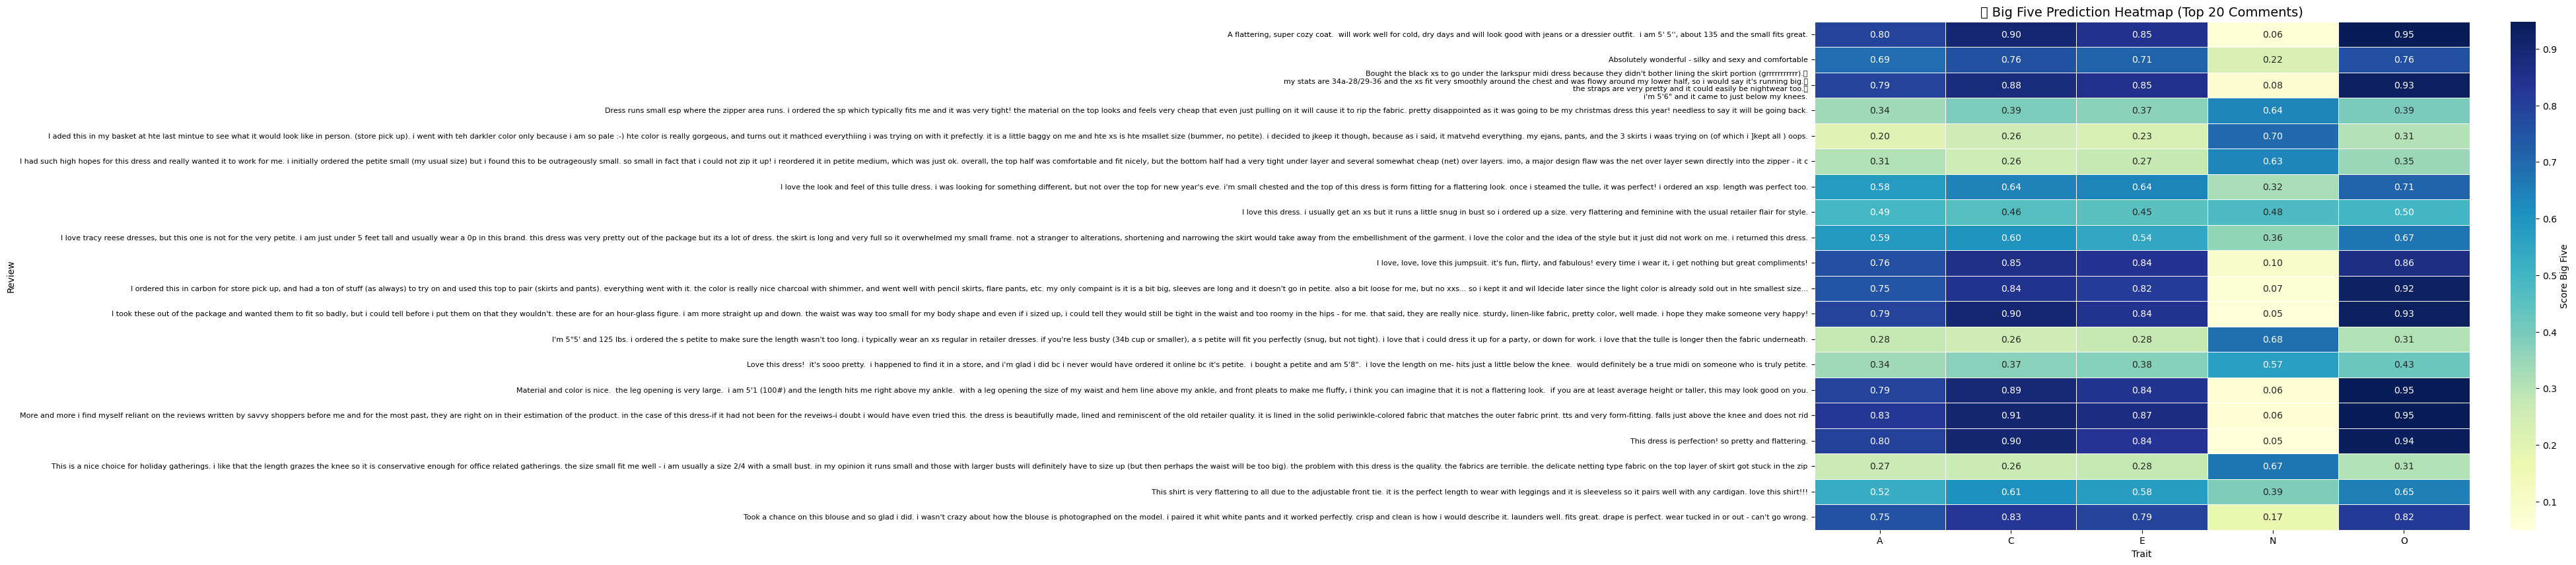

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Affichage d’un tableau esthétique avec Seaborn
plt.figure(figsize=(16, 10))

# Sélectionner les premières lignes pour visualisation lisible
subset = df_predictions[["Review Text", "O", "C", "E", "A", "N"]].head(20)

# 💅 Formatage long pour heatmap
subset_long = subset.melt(id_vars="Review Text", var_name="Trait", value_name="Score")

# 🖼️ Heatmap avec les valeurs
pivot_table = subset_long.pivot(index="Review Text", columns="Trait", values="Score")
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5, cbar_kws={"label": "Score Big Five"})

plt.title("🎯 Big Five Prediction Heatmap (Top 20 Comments)", fontsize=14)
plt.xlabel("Trait")
plt.ylabel("Review")
plt.xticks(rotation=0)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


In [36]:
from IPython.display import display
import pandas as pd

# 🔢 Affichage structuré en style tableau (comme Streamlit / Dash)
styled_df = df_display.head(20).style.set_properties(
    **{'background-color': '#111827',
       'color': 'white',
       'border-color': 'gray',
       'text-align': 'left',
       'font-family': 'Arial'}
).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#1f2937'), ('color', 'white'), ('text-align', 'left')]}
]).set_caption("📊 Prédictions Big Five — Top 20 commentaires")

display(styled_df)


,Review Text,O,C,E,A,N
0,Absolutely wonderful - silky and sexy and comfortable,0.760000,0.760000,0.710000,0.690000,0.220000
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",0.430000,0.370000,0.380000,0.340000,0.570000
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",0.350000,0.260000,0.270000,0.310000,0.630000
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",0.860000,0.850000,0.840000,0.760000,0.100000
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,0.650000,0.610000,0.580000,0.520000,0.390000
5,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",0.670000,0.600000,0.540000,0.590000,0.360000
6,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",0.310000,0.260000,0.230000,0.200000,0.700000
7,"I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...",0.920000,0.840000,0.820000,0.750000,0.070000
8,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,0.500000,0.460000,0.450000,0.490000,0.480000
9,"I'm 5""5' and 125 lbs. i ordered the s petite to make sure the length wasn't too long. i typically wear an xs regular in retailer dresses. if you're less busty (34b cup or smaller), a s petite will fit you perfectly (snug, but not tight). i love that i could dress it up for a party, or down for work. i love that the tulle is longer then the fabric underneath.",0.310000,0.260000,0.280000,0.280000,0.680000


In [42]:
import joblib

# 💾 Sauvegarde du modèle entraîné dans un fichier .pkl
joblib.dump(model, "best_modell_.pkl")

print("✅ Modèle  sauvegardé sous le nom : best_modell_.pkl")


✅ Modèle  sauvegardé sous le nom : best_modell_.pkl
